<a href="https://colab.research.google.com/github/gabyspina/Data_science/blob/main/ProyectoDSParteISpina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Data science**
#### Análisis del Gasto en Viajes

## **Descripción del dataset**

El dataset contiene información sobre viajes realizados por personas de diferentes partes del mundo. Cada fila representa un viaje individual, incluyendo datos sobre el país y ciudad de destino, duración del viaje, gasto estimado, tipo de transporte y alojamiento, actividades realizadas, y calificaciones otorgadas al viaje y al destino.
En total, el dataset incluye 20 columnas que permiten hacer un análisis detallado del comportamiento turístico global.



### Detalle de las columnas.




*   **ID_Viajero**: Código único que identifica a cada viajero
*   **Nombre_Completo**: Nombre y apellido del viajero.
*   **Edad**: Edad del viajero al momento del viaje.
*   **Género**: Género declarado del viajero.
***País_Origen**: País desde donde inicia el viaje.
***País_Destino**: País al que se dirige el viajero.
***Ciudad_Destino**: Ciudad de destino específica del viaje.
***Continente**: Continente donde se encuentra la ciudad de destino.
***Duración_Viaje_Días** Número total de días que dura el viaje.
***Propósito_Viaje**: Motivo principal del viaje (ocio, negocios, aventura, etc.).
***Alojamiento**: Tipo de alojamiento utilizado durante el viaje (hostel, resort, etc.).
***Presupuesto_Diario_USD**: Estimación de gasto por día en dólares estadounidenses.
***Transporte** | Medio de transporte utilizado principal.
***Actividades**: Actividades realizadas durante el viaje (pueden ser varias separadas por ;).
***Calificación_Viaje**: Puntuación general del viaje del 1 al 5.
***Calificación_Destino**: Puntuación del destino específico del viaje del 1 al 5.
***Recomendaría**: Si recomendaría el viaje (Sí / No).
***Fecha_Viaje**: Fecha de inicio del viaje.
***Comentario**: Comentario libre sobre el viaje.



## Objetivo del estudio


*   El objetivo principal es identificar diferencias en el gasto total entre viajes nacionales e internacionales utilizando visualizaciones.

*   Hipótesis planteadas:

  1.   La primera hipótesis de que los viajes internacionales generan un gasto total mayor en comparación con los viajes nacionales.
  2.   La segunda se pregunta si el turismo en las ciudades europeas generan más gastos que en otras del mundo.
  3.   El mayor gasto lo realizan las personas mayores a 30 años.

* Este análisis es relevante ya que se presume que los viajes al extranjero implican mayores costos por diferentes factores como transporte y alojamiento.




In [ ]:
# Proyecto Final Parte I - Gabriel Spina

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos directamente desde Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1djWgCfqYbZfhEaQNlBVjg79kFDhaECBHEUyGz3ctMxw/export?format=csv"
df = pd.read_csv(sheet_url)

# Creación de variable "Tipo de viaje" y "Viaje Internacional"
# Sirve para diferenciar cuando un viaje dentro o fuera del país de donde es es el viajero.
df["Viaje_Internacional"] = df["País_Origen"] != df["País_Destino"]
df["Tipo_Viaje"] = df["Viaje_Internacional"].map({True: "Internacional", False: "Nacional"})

# Creación de variable Gasto total
# Calcula cuánto se gastó en total en cada viaje, para comparar entre tipos de viaje y continentes.
df["Gasto_Total"] = df["Presupuesto_Diario_USD"] * df["Duración_Viaje_Días"]


## Visualizaciones

### 1. **Gasto Total: Nacional vs Internacional (Boxplot - Matplotlib)**

 Comparación del gasto total entre viajes nacionales e internacionales, visualizando la mediana y la dispersión de los datos.

<Figure size 800x500 with 0 Axes>

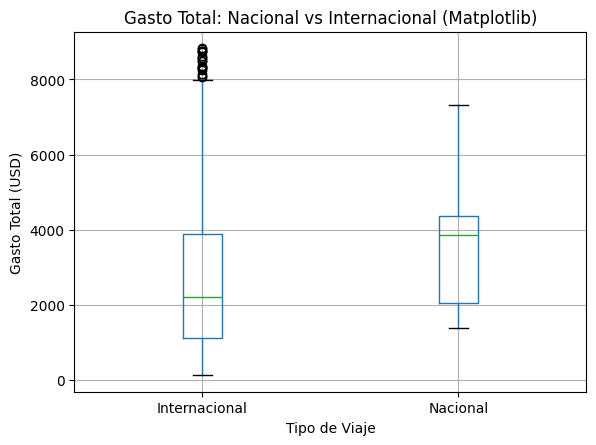

In [ ]:
plt.figure(figsize=(8,5))
df.boxplot(column="Gasto_Total", by="Tipo_Viaje")
plt.title("Gasto Total: Nacional vs Internacional (Matplotlib)")
plt.suptitle("")
plt.xlabel("Tipo de Viaje")
plt.ylabel("Gasto Total (USD)")
plt.show()


La mediana es mayor en los viajes nacionales que en los internacionales. Esto indica que la mayoría de los viajes nacionales tienen un gasto más elevado en promedio que los internacionales.

Hay muchos valores atípicos (outliers) en los viajes internacionales, lo que sugiere que algunos viajeros gastaron muchísimo más en ese tipo de viaje, aunque la mayoría gastó menos que en los viajes nacionales.

### 2. **Distribución del Gasto Total (Histograma - Matplotlib)**
Frecuencia de viajes agrupados según el monto total gastado, permitiendo observar cómo se distribuyen los gastos.

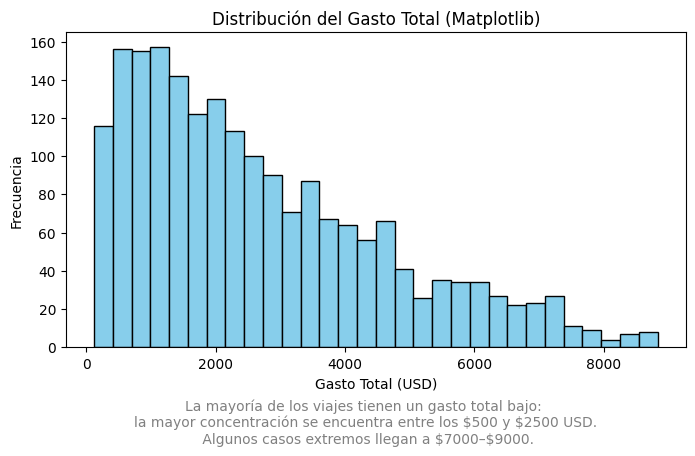

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

# 1. Histograma
ax.hist(df["Gasto_Total"], bins=30, color='skyblue', edgecolor='black')

# 2. Títulos y etiquetas
ax.set_title("Distribución del Gasto Total (Matplotlib)")
ax.set_xlabel("Gasto Total (USD)")
ax.set_ylabel("Frecuencia")

# 3. Ajustar espacio para el texto exterior
fig.subplots_adjust(bottom=0.25)  # Deja espacio extra abajo

# 4. Texto explicativo debajo del eje X
texto = (
    "La mayoría de los viajes tienen un gasto total bajo: \n"
    "la mayor concentración se encuentra entre los \$500 y \$2500 USD.\n "
    "Algunos casos extremos llegan a \$7000–\$9000."
)
fig.text(
    0.5,    # posición horizontal (0 = izquierda, 1 = derecha)
    0.10,   # posición vertical relativa en toda la figura
    texto,
    ha='center',
    va='center',
    fontsize=10,
    color='gray'
)

plt.show()

### 3. **Cantidad de Viajes por Continente (Barras - Matplotlib)**

Cantidad total de viajes realizados a cada continente, mostrando qué regiones son las más visitadas.

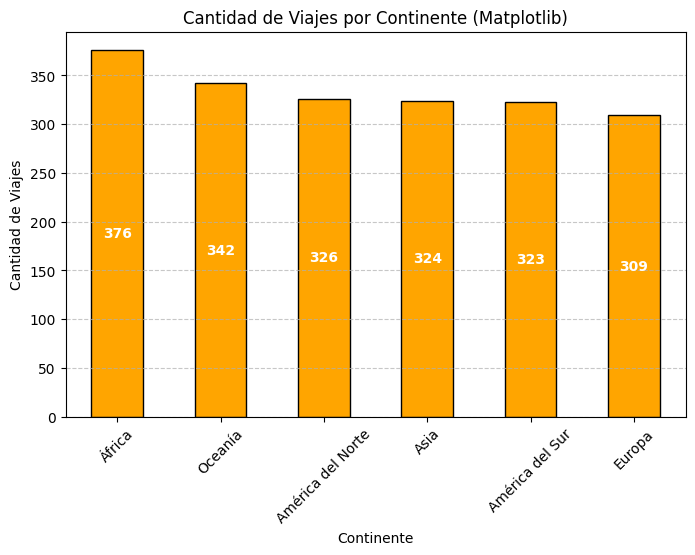

In [ ]:
viajes_continente = df["Continente"].value_counts()
plt.figure(figsize=(8,5))
bars = viajes_continente.plot(kind='bar', edgecolor='black', color='orange')

# Valores centrados
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height()/2,
        f'{int(bar.get_height())}',
        ha='center',
        va='center',
        color='white',
        fontweight='bold'
    )

plt.title("Cantidad de Viajes por Continente (Matplotlib)")
plt.xlabel("Continente")
plt.ylabel("Cantidad de Viajes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


En África y Oceanía se concentran la mayor parte de los viajes. Los que se realizan hacia Europa es la más baja.

Europa es un destino premium (alto gasto por viaje) pero de menor volumen de viajes.

África y Oceanía atraen a más viajeros, quizás por rutas más económicas o turismo de aventura.

### 4. **Gasto Total por Continente (Boxplot - Seaborn)**

Comparación del gasto total entre continentes, destacando diferencias en la mediana y variabilidad del gasto por destino.

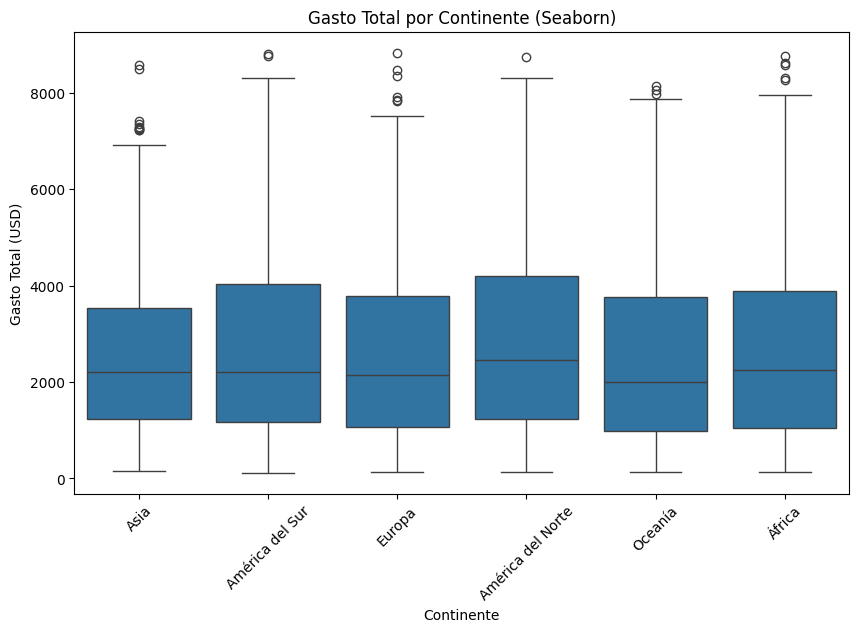

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Continente", y="Gasto_Total", data=df)
plt.title("Gasto Total por Continente (Seaborn)")
plt.xlabel("Continente")
plt.ylabel("Gasto Total (USD)")
plt.xticks(rotation=45)
plt.show()

No hay un único continente con gasto dominante. El gasto en todos es bastante parejo.

América del Norte y del Sur se destacan por su gasto medio más elevado.

Europa no es el más caro en promedio, aunque sí tiene una gran dispersión, lo que refleja viajes muy variados en términos de costo.

Esto desafía parcialmente la hipótesis inicial (que Europa es la más costosa en general), y muestra que el gasto varía según tipo de viaje, duración y destino específico dentro del continente.

### 5. **Distribución del Gasto Total por Continente (Violinplot - Seaborn)**
Distribución de gastos en cada continente, combinando boxplot y densidad de datos para mostrar tendencias de gasto.

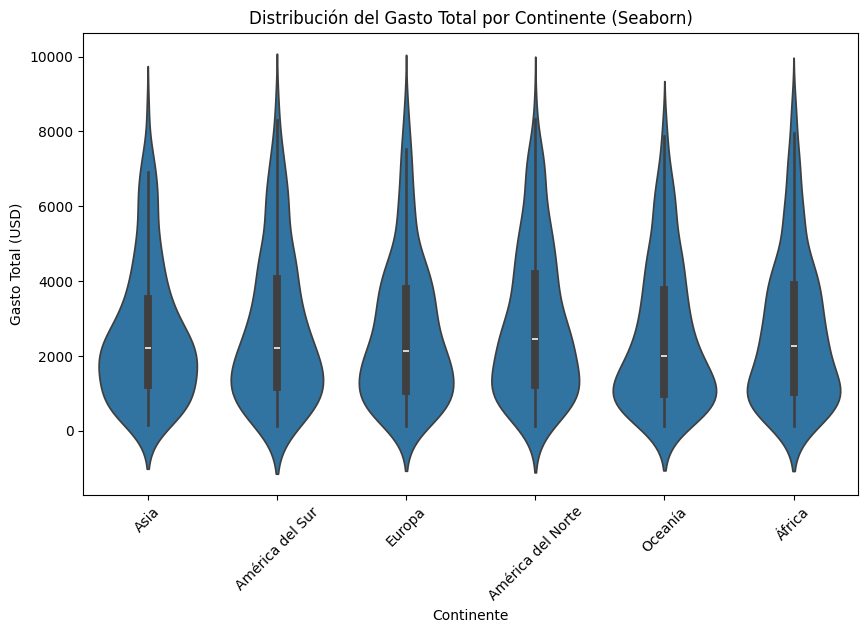

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x="Continente", y="Gasto_Total", data=df)
plt.title("Distribución del Gasto Total por Continente (Seaborn)")
plt.xlabel("Continente")
plt.ylabel("Gasto Total (USD)")
plt.xticks(rotation=45)
plt.show()

Este gráfico muestra que en todos los continentes, la mayoría de los viajes concentran su gasto total entre los 1000 y 3000 USD.
Las formas de las curvas revelan que hay distintos perfiles de viajeros: algunos con presupuestos bajos y otros con gastos muy elevados, aunque estos últimos son minoría.
América del Norte, Europa y África presentan mayor dispersión, lo que indica más diversidad en los niveles de gasto.
En definitiva, aunque hay diferencias, la distribución es bastante similar entre regiones, con un patrón común de viajes moderados y algunos casos extremo

### 6. **Dispersión del Gasto Total por Continente (Stripplot - Seaborn)**
Visualización de cada viaje como un punto individual, se puede analizar la concentración y dispersión de los gastos por continente.

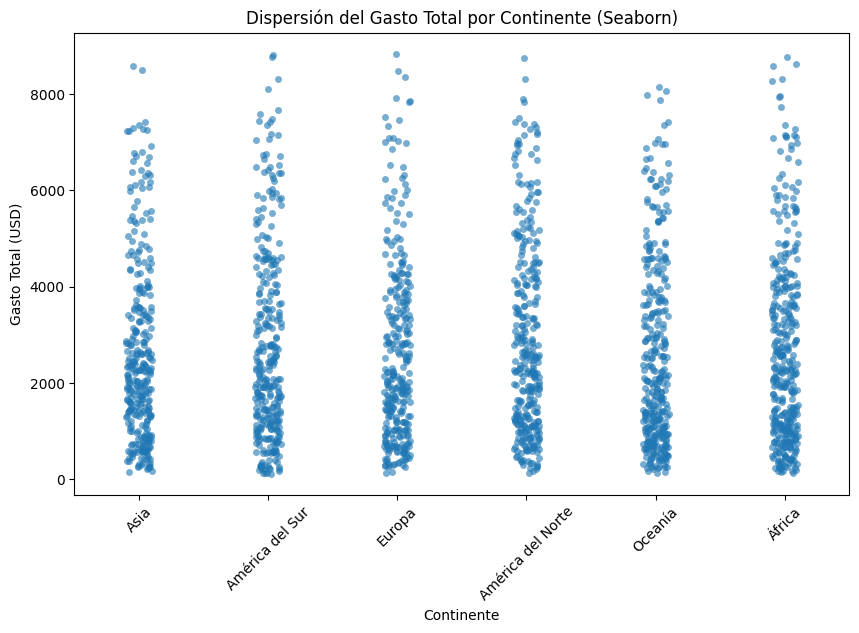

In [ ]:
plt.figure(figsize=(10,6))
sns.stripplot(x="Continente", y="Gasto_Total", data=df, jitter=True, alpha=0.6)
plt.title("Dispersión del Gasto Total por Continente (Seaborn)")
plt.xlabel("Continente")
plt.ylabel("Gasto Total (USD)")
plt.xticks(rotation=45)
plt.show()

De esta manera podemos visualizar con los viajes especificamente lo que detallabamos en el punto anterior.

En donde la mayoría de los gastos son moderados y no hay grán diferencia entre los continentes respecto a sus gastos.
En todos existen puntos aisaldos de grandes gastos


### 7. **Comparación del Gasto Total según Grupo Etario (Boxplot - Seaborn)**

Este gráfico compara el gasto total (en USD) entre dos grupos de viajeros: los de 30 años o menos, y los mayores de 30.


<ipython-input-3-8010ce00fdf2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Grupo_Edad", y="Gasto_Total", data=df, palette="pastel")


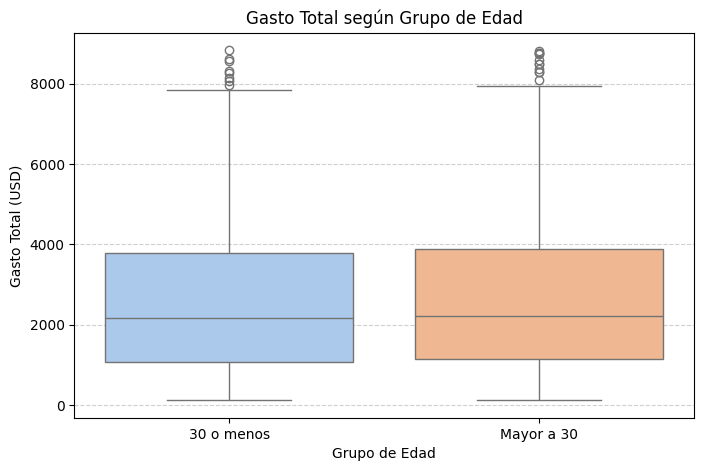

In [ ]:
# Creación de columna edad
df["Grupo_Edad"] = df["Edad"].apply(lambda x: "Mayor a 30" if x > 30 else "30 o menos")

# 2. Crear el gráfico
plt.figure(figsize=(8,5))
sns.boxplot(x="Grupo_Edad", y="Gasto_Total", data=df, palette="pastel")

# 3. Títulos
plt.title("Gasto Total según Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Gasto Total (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


La hipótesis se confirma parcialmente:

Las personas mayores de 30 años tienen, en promedio, un gasto total ligeramente más alto, pero no es una diferencia significativa.

Esto sugiere que aunque puede haber una tendencia, la edad no es un factor determinante por sí solo del gasto total. Otras variables como duración del viaje, continente de destino, o tipo de alojamiento podrían influir más.

### 8. **Top 10 Ciudades Más Visitadas (Barras - Matplotlib)**

Ranking de las 10 ciudades más visitadas, basado en la cantidad de viajes registrados hacia cada destino

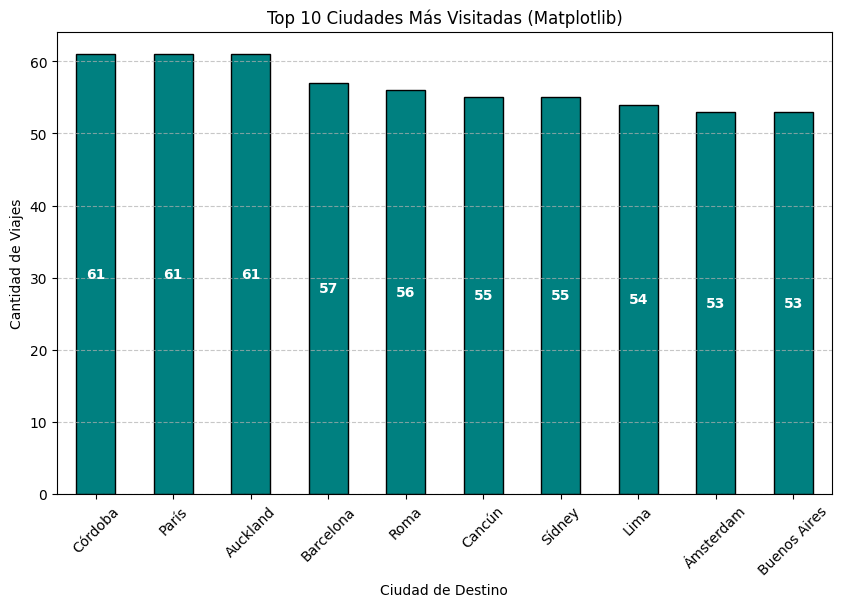

In [ ]:
ciudades_mas_visitadas = df["Ciudad_Destino"].value_counts().head(10)  # Top 10 ciudades
plt.figure(figsize=(10,6))
bars = ciudades_mas_visitadas.plot(kind='bar', color='teal', edgecolor='black')

# Agregar valores centrados en las columnas
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height()/2,
        f'{int(bar.get_height())}',
        ha='center',
        va='center',
        color='white',
        fontweight='bold'
    )

plt.title("Top 10 Ciudades Más Visitadas (Matplotlib)")
plt.xlabel("Ciudad de Destino")
plt.ylabel("Cantidad de Viajes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Conclusiones

Las conclusiones que puedo deducir basado en el naálisis son:

* **Hipótesis 1**: Los viajes internacionales generan más gastos que los
nacionales.
    * **Conclusión**:  Se observa que la mediana del gasto es mayor en viajes nacionales, pero los internacionales tienen mayor dispersión y más valores extremos, lo que indica que algunos viajeros gastan muchísimo más. Por lo tanto, la hipótesis no se confirma totalmente: aunque algunos viajes internacionales son muy costosos, en promedio, los viajes nacionales pueden implicar más gasto.

* **Hipótesis 2**: Los viajes a ciudades europeas presentan mayor gasto que a otras regiones.
    * **Conclusión**: Europa no es la región con mayor gasto promedio, aunque tiene una alta variabilidad.América del Norte y del Sur presentan mayores medianas de gasto total. Europa tiene viajes económicos y de lujo, pero no concentra los más caros. Por tanto, la hipótesis se cumple parcialmente, ya que Europa tiene altos gastos, pero no es la más costosa en promedio.

* **Hipotesís 3**: Las personas mayores de 30 años realizan un gasto total mayor que las menores.
    * **Conclusión**: La mediana de gasto es ligeramente mayor en el grupo de mayores de 30 años, pero la diferencia no es significativa. Ambos grupos tienen distribución similar y presencia de outliers. Por lo tanto, la edad no parece ser un factor determinante en el gasto turístico, y la hipótesis no se confirma de forma clara.